In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
#Import data
df = pd.read_csv('cardio.csv')

#print the head
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Shape of the data
df.shape

(70000, 13)

In [5]:
#Count the NaN
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
#View descriptive statistics
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Count the number of patients with or without cardiovascular disease
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

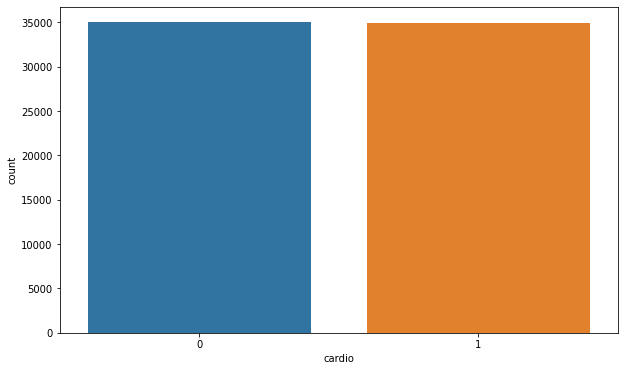

In [8]:
#Visualize the count
plt.figure(figsize=(10,6))
sns.countplot(df['cardio'])

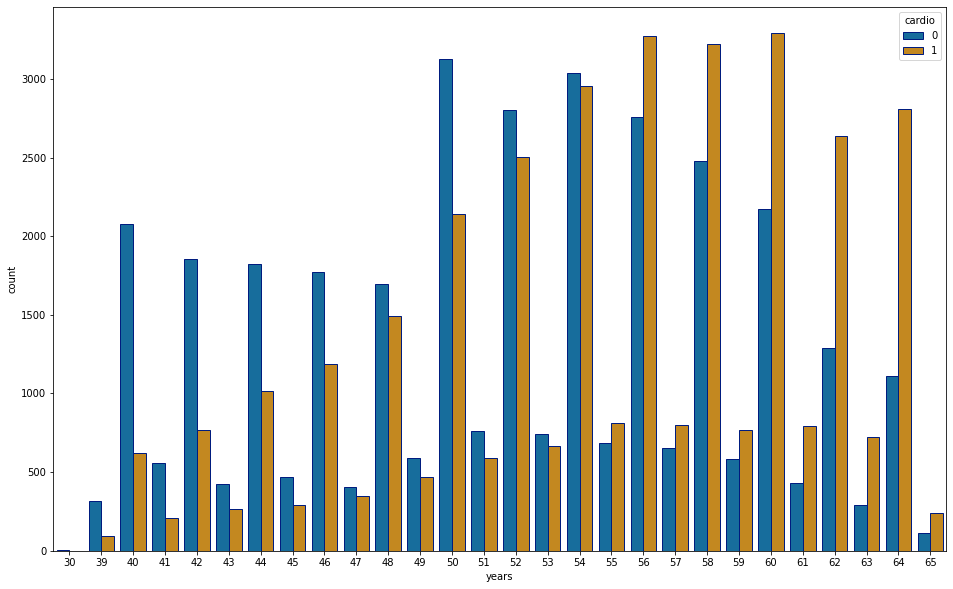

In [9]:
#Create a years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast='integer')

#Visualize the data
plt.figure(figsize=(16,10))
sns.countplot(x='years', hue='cardio', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

In [10]:
#Get the correlation
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


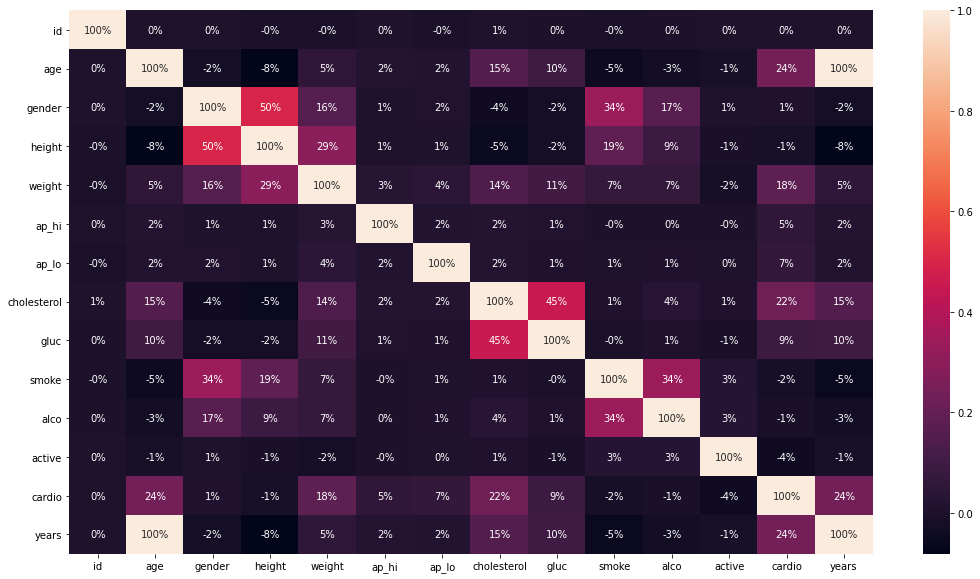

In [11]:
#Visualize the corellation
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [12]:
#Drop the years column
df = df.drop('years', axis=1)

#drop the id column
df = df.drop('id', axis=1)

In [13]:
#Split the data into feature and target data
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [14]:
#Split the data into 75% training data and 25% test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state= 1)

In [15]:
#Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#Use Random Forest Classifier
#forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
#forest.fit(X_train, Y_train)

In [ ]:
#Lets find out the best params setup for a precise model

#scoring = ['accuracy', 'recall', 'f1', 'precision', "roc_auc"]
#n_estimators_range = list(range(10, 200, 10))
#learning_rate_range = np.arange(0.1, 2, 0.1)
#algorithm_options = ['SAMME', 'SAMME.R']

#ABC = AdaBoostClassifier(random_state=1)

#param_grid = dict(n_estimators=n_estimators_range, learning_rate=learning_rate_range, algorithm=algorithm_options)

#grid = GridSearchCV(ABC, param_grid, scoring='recall', n_jobs=-1, verbose=10)
#grid.fit(X_train, Y_train)

In [19]:
#Show the scores
print('The best params are: {}'.format(grid.best_params_))
print()
print('The best score is: {}'.format(grid.best_score_))
print()
print('The mean cross-validated score is: {}'.format(grid.score(X_test, Y_test)))

The best params are: {'algorithm': 'SAMME', 'learning_rate': 1.6, 'n_estimators': 10}

The best score is: 0.6745270514555232

The mean cross-validated score is: 0.7127432234844224


In [20]:
#Use AdaBoost
forest = AdaBoostClassifier(n_estimators=10, learning_rate=1.6, random_state=1, algorithm='SAMME')
forest.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.6,
                   n_estimators=10, random_state=1)

In [21]:
#Model accuracy on the training data
model = forest 
round(model.score(X_train, Y_train), 3)

0.731

In [22]:
#Show the classification report in the test data
prediction = forest.predict(X_test)
target_names = ['TP + FP', 'TN + FN']
print(classification_report(Y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

     TP + FP       0.72      0.75      0.73      8609
     TN + FN       0.75      0.71      0.73      8891

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



In [23]:
#Model accuracy on the test data
cm = confusion_matrix(Y_test, model.predict(X_test))

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print()
print(cm)
print()
print('True positive is: {}'.format(TP))
print('False positive is: {}'.format(FP))
print('False negative is: {}'.format(FN))
print('True negative is: {}'.format(TN))


[[6444 2165]
 [2554 6337]]

True positive is: 6444
False positive is: 2165
False negative is: 2554
True negative is: 6337
